In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

Reading Data


In [2]:
taxi_jan_2024 = pd.read_parquet("data/yellow_tripdata_2024-01.parquet")
taxi_data = pd.concat([taxi_jan_2024])

In [3]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [4]:
taxi_data.shape

(2964624, 19)

In [5]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [6]:
taxi_data = taxi_data[[ 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
                       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'total_amount']]

In [7]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


Testing Data

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

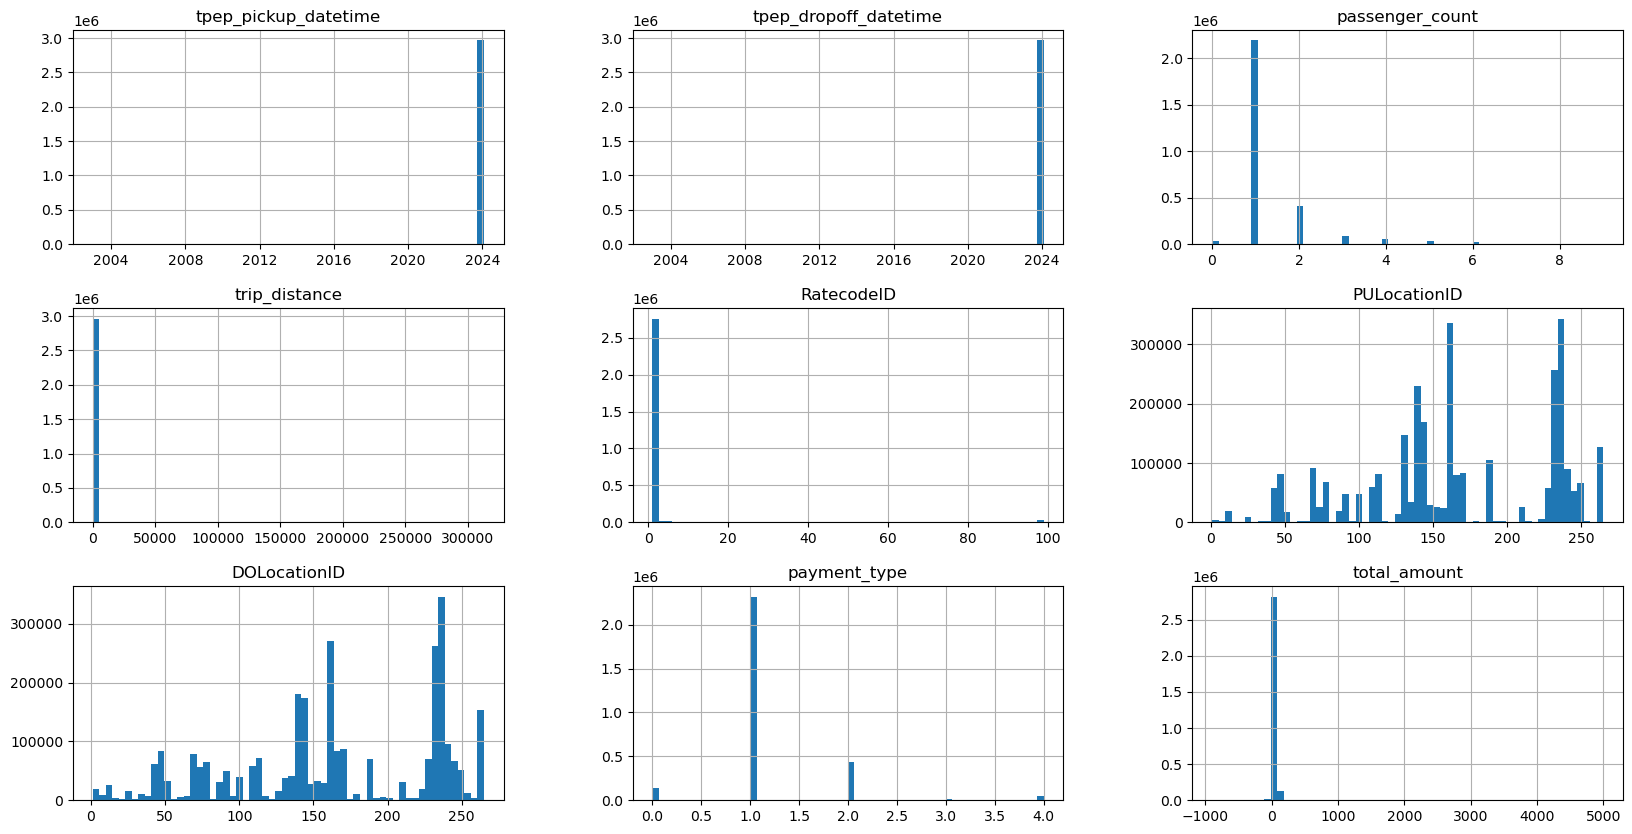

In [8]:
taxi_data.hist(figsize = (20,10), bins = 60)

In [9]:
taxi_data['RatecodeID'].value_counts()

RatecodeID
1.0     2663350
2.0       98713
99.0      28663
5.0       19410
3.0        7954
4.0        6365
6.0           7
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

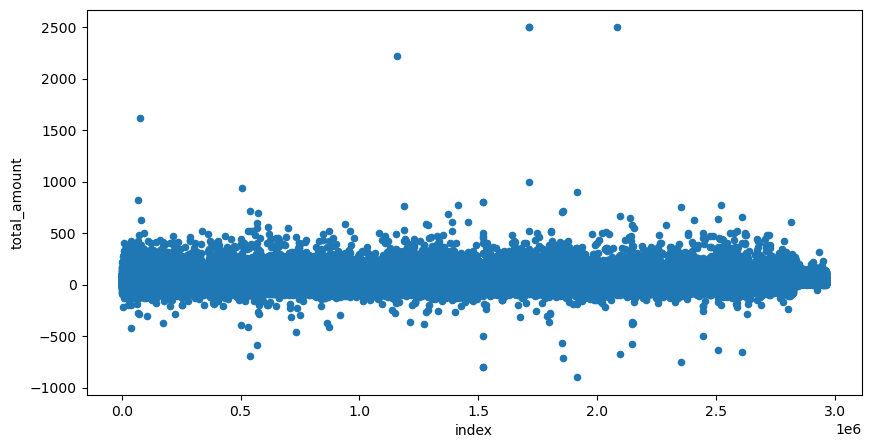

In [10]:
taxi_data[taxi_data['total_amount'] < 3000].reset_index().plot( kind = 'scatter' , y = 'total_amount', x = 'index', figsize = (10, 5))

In [11]:
taxi_data[taxi_data['total_amount'] < 0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
99,2024-01-01 00:18:24,2024-01-01 00:30:39,1.0,2.16,1.0,249,232,4,-18.50
506,2024-01-01 00:04:00,2024-01-01 00:04:44,1.0,0.01,5.0,63,63,2,-34.25
536,2024-01-01 00:41:42,2024-01-01 00:46:00,1.0,0.47,1.0,249,113,4,-10.80
552,2024-01-01 00:42:02,2024-01-01 01:14:33,1.0,5.48,1.0,107,61,2,-38.10
682,2024-01-01 00:24:02,2024-01-01 01:10:32,1.0,8.74,1.0,90,225,4,-52.80


In [12]:
taxi_data[taxi_data['total_amount'] < 0][taxi_data['payment_type']==2].value_counts()

/var/folders/kr/n4smrkxd3n518m4xkv2506h80000gn/T/ipykernel_74757/594643572.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  taxi_data[taxi_data['total_amount'] < 0][taxi_data['payment_type']==2].value_counts()


tpep_pickup_datetime  tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  total_amount
2024-01-01 00:04:00   2024-01-01 00:04:44    1.0              0.01           5.0         63            63            2             -34.25          1
2024-01-21 21:39:41   2024-01-21 21:44:46    1.0              2.44           1.0         132           132           2             -16.35          1
2024-01-21 21:35:18   2024-01-21 21:40:10    1.0              1.05           1.0         230           163           2             -12.20          1
2024-01-21 21:22:35   2024-01-21 21:50:39    1.0              17.64          2.0         132           148           2             -75.75          1
2024-01-21 21:17:04   2024-01-21 21:32:52    1.0              10.09          1.0         132           196           2             -42.25          1
                                                                                                               

<Axes: >

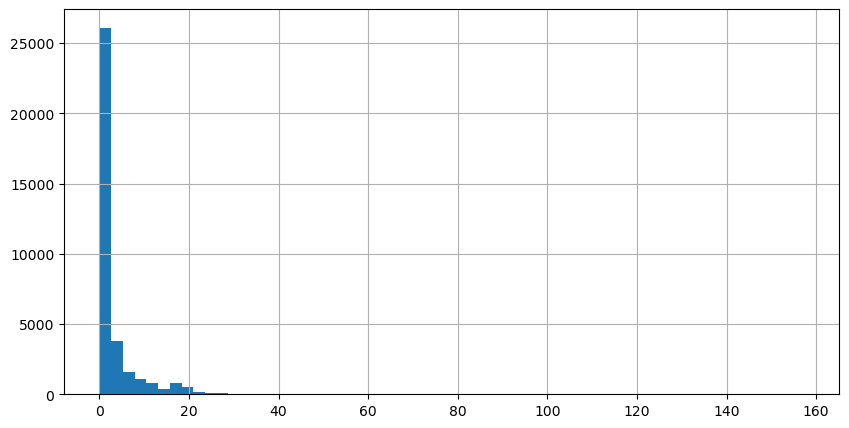

In [13]:
taxi_data[taxi_data['total_amount'] < 0]['trip_distance'].hist(bins = 60, figsize = (10,5))

In [14]:
taxi_data[taxi_data['total_amount'] > 500].shape

(62, 9)

In [15]:
taxi_data[~taxi_data['RatecodeID'].isna()].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


Cleaning Data

In [16]:
taxi_data_cleansed = taxi_data[(taxi_data['total_amount']>=0) & (taxi_data['total_amount']< 500) & (~taxi_data['RatecodeID'].isna())]
print(taxi_data.shape)
taxi_data_cleansed.shape

(2964624, 9)


(2788897, 9)

In [17]:
taxi_data_cleansed.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

Data Preparation

In [18]:
taxi_data_prepared = taxi_data_cleansed.copy()
taxi_data_prepared

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10
...,...,...,...,...,...,...,...,...,...
2824457,2024-01-31 23:10:28,2024-01-31 23:18:30,1.0,3.51,1.0,138,129,1,30.31
2824458,2024-01-31 23:01:04,2024-01-31 23:17:35,1.0,3.36,1.0,162,261,1,29.25
2824459,2024-01-31 23:08:13,2024-01-31 23:25:00,3.0,3.30,1.0,43,249,1,23.70
2824460,2024-01-31 23:49:46,2024-01-31 23:53:10,0.0,0.40,1.0,142,163,2,10.10


In [19]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
total_amount                    float64
dtype: object

In [20]:
taxi_data_prepared.loc[:, 'PULocationID'] = taxi_data_prepared['PULocationID'].astype('str') 
taxi_data_prepared.loc[:, 'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype('str') 
taxi_data_prepared.loc[:, 'RatecodeID'] = taxi_data_prepared['RatecodeID'].astype('str') 
taxi_data_prepared.loc[:, 'payment_type'] = taxi_data_prepared['payment_type'].astype('str') 

/var/folders/kr/n4smrkxd3n518m4xkv2506h80000gn/T/ipykernel_74757/982587025.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['186' '140' '236' ... '43' '142' '140']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  taxi_data_prepared.loc[:, 'PULocationID'] = taxi_data_prepared['PULocationID'].astype('str')
/var/folders/kr/n4smrkxd3n518m4xkv2506h80000gn/T/ipykernel_74757/982587025.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['79' '236' '79' ... '249' '163' '263']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  taxi_data_prepared.loc[:, 'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype('str')
/var/folders/kr/n4smrkxd3n518m4xkv2506h80000gn/T/ipykernel_74757/982587025.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and wil

In [21]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [27]:
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_date'] = taxi_data_prepared['tpep_pickup_datetime'].dt.date
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour
del taxi_data_prepared['year']
taxi_data_prepared

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_year,transaction_date,transaction_month,transaction_day,transaction_hour
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70,2024,2024-01-01,1,1,0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75,2024,2024-01-01,1,1,0
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30,2024,2024-01-01,1,1,0
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00,2024,2024-01-01,1,1,0
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10,2024,2024-01-01,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824457,2024-01-31 23:10:28,2024-01-31 23:18:30,1.0,3.51,1.0,138,129,1,30.31,2024,2024-01-31,1,31,23
2824458,2024-01-31 23:01:04,2024-01-31 23:17:35,1.0,3.36,1.0,162,261,1,29.25,2024,2024-01-31,1,31,23
2824459,2024-01-31 23:08:13,2024-01-31 23:25:00,3.0,3.30,1.0,43,249,1,23.70,2024,2024-01-31,1,31,23
2824460,2024-01-31 23:49:46,2024-01-31 23:53:10,0.0,0.40,1.0,142,163,2,10.10,2024,2024-01-31,1,31,23


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_year'}>],
       [<Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>,
        <Axes: title={'center': 'transaction_hour'}>]], dtype=object)

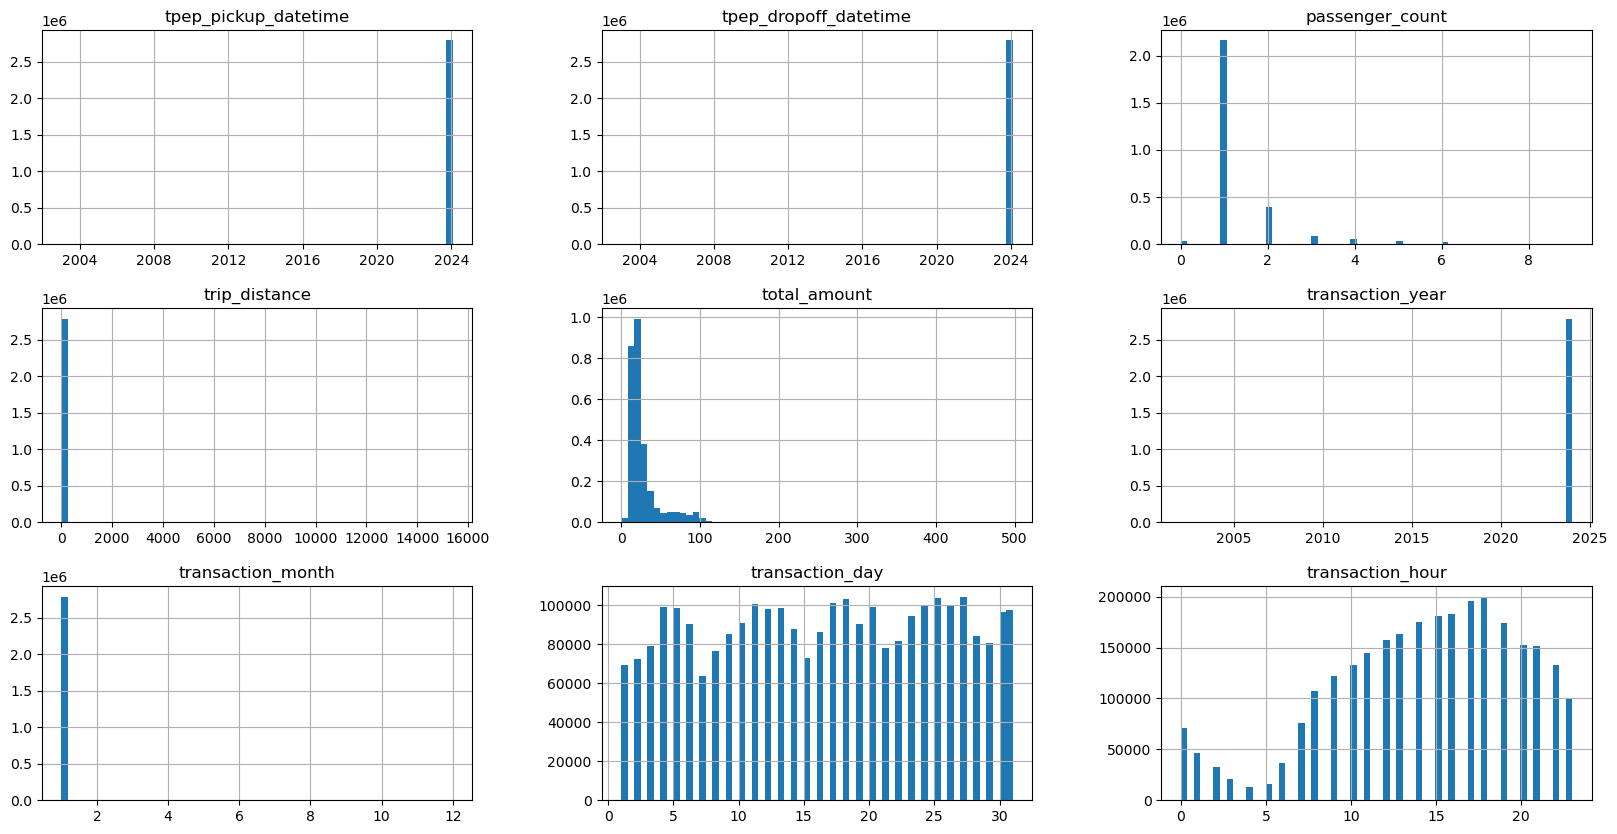

In [31]:
taxi_data_prepared.hist(bins = 60, figsize = (20, 10))

<Axes: xlabel='index', ylabel='total_amount'>

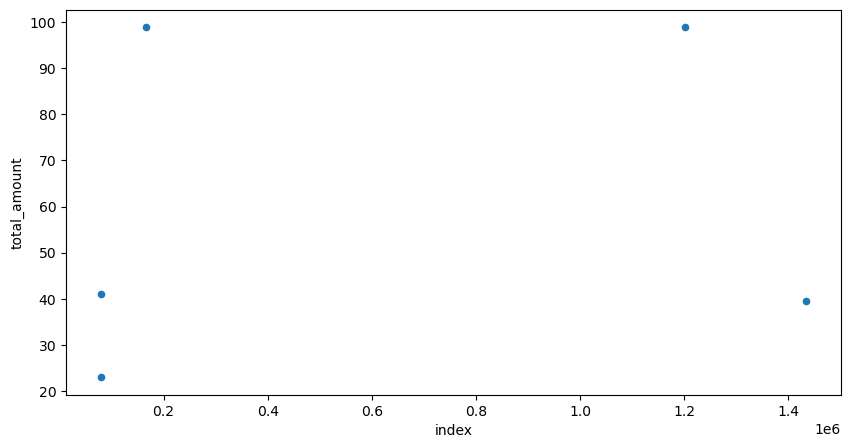

In [55]:
taxi_data_prepared[taxi_data_prepared['trip_distance'] > 300].reset_index().plot( kind = 'scatter' , y = 'total_amount', x = 'index', figsize = (10, 5))

In [56]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year'] == 2024]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month'] == 1]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['trip_distance'] < 300]
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_year,transaction_date,transaction_month,transaction_day,transaction_hour
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70,2024,2024-01-01,1,1,0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75,2024,2024-01-01,1,1,0
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30,2024,2024-01-01,1,1,0
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00,2024,2024-01-01,1,1,0
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10,2024,2024-01-01,1,1,0


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_year'}>],
       [<Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>,
        <Axes: title={'center': 'transaction_hour'}>]], dtype=object)

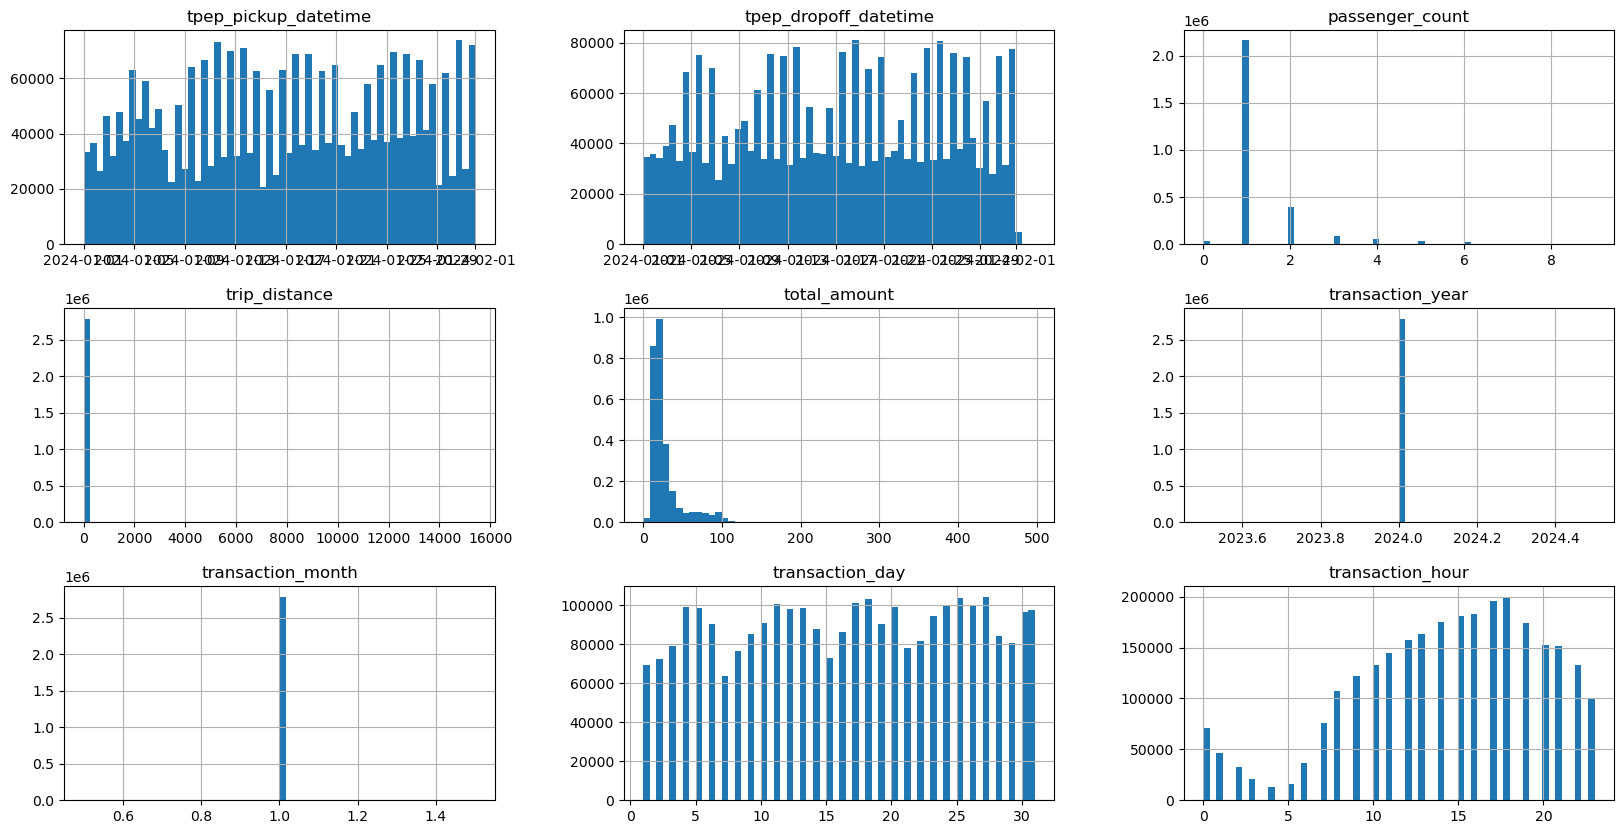

In [51]:
taxi_data_prepared.hist(bins = 60, figsize = (20, 10))

Noting categorical and numerical columns

In [58]:
categorical_columns = ['PULocationID', 'transaction_year', 'transaction_month', 'transaction_day', 'transaction_hour']
numerical_columns = ['trip_distance', 'total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [59]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head

(2788875, 7)


<bound method NDFrame.head of         PULocationID  transaction_year  transaction_month  transaction_day  \
0                186              2024                  1                1   
1                140              2024                  1                1   
2                236              2024                  1                1   
3                 79              2024                  1                1   
4                211              2024                  1                1   
...              ...               ...                ...              ...   
2824457          138              2024                  1               31   
2824458          162              2024                  1               31   
2824459           43              2024                  1               31   
2824460          142              2024                  1               31   
2824461          140              2024                  1               31   

         transaction_hour  trip_d

In [89]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']

In [90]:
taxi_grouped_by_region

,PULocationID,transaction_year,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2024,1,1,5,0.000000,109.200000,1
1,1,2024,1,1,6,0.020000,76.000000,3
2,1,2024,1,1,13,0.000000,108.983333,3
3,1,2024,1,1,14,0.001667,85.680000,6
4,1,2024,1,1,15,0.000000,145.620000,2
...,...,...,...,...,...,...,...,...
72037,98,2024,1,30,5,14.600000,60.970000,2
72038,98,2024,1,31,5,12.500000,51.000000,1
72039,98,2024,1,31,10,17.100000,67.940000,1
72040,98,2024,1,31,12,0.600000,10.100000,1


5. Benchmark Model

In [92]:
data_for_benchmark_model = taxi_grouped_by_region.copy()
categorical_features_benchmark = ['PULocationID', 'transaction_year', 'transaction_month', 'transaction_day', 'transaction_hour']
input_features_benchmark = categorical_features_benchmark + ['trip_distance']
target_features_benchmark = ['total_amount']

5.1. Train test split

In [109]:
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
Y_bench = data_for_benchmark_model[target_features_benchmark]

#one-hot encode

print(X_bench)
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(X_bench, Y_bench, test_size = 0.33, random_state = 42)

help(train_test_split)

      PULocationID  transaction_year  transaction_month  transaction_day  \
0                1              2024                  1                1   
1                1              2024                  1                1   
2                1              2024                  1                1   
3                1              2024                  1                1   
4                1              2024                  1                1   
...            ...               ...                ...              ...   
72037           98              2024                  1               30   
72038           98              2024                  1               31   
72039           98              2024                  1               31   
72040           98              2024                  1               31   
72041           98              2024                  1               31   

       transaction_hour  trip_distance  
0                     5       0.000000  
1    

In [111]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 10)
tree.fit(X_train_b, Y_train_b)

DecisionTreeRegressor(max_depth=10)

In [ ]:
model_at_hand = tree
